<a href="https://colab.research.google.com/github/cheronoF/Data-Science/blob/main/Data_Science_Core_W7_Independent_Project_2021_11_Faith_Rotich_Report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Defining the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

Within your deliverable you are expected to:

Define the question, the metric for success, the context, experimental design taken.
Read and explore the given dataset.
Define the appropriateness of the available data to answer the given question.
Find and deal with outliers, anomalies, and missing data within the dataset.
Perform univariate, bivariate and multivariate analysis recording your observations.
Performing regression analysis.
Incorporate categorical independent variables into your models.
Check for multicollinearity
Provide a recommendation based on your analysis. 
Create residual plots for your models, and assess heteroskedasticity using Barlett's test.
Challenge your solution by providing insights on how you can make improvements in model improvement.
While performing your regression analysis, you will be required to perform modeling using the given regression techniques then evaluate their performance. You will be then required to provide your observations and recommendation on the suitability of each of the tested models on their appropriateness of solving the given problem. 

Multiple Linear Regression
Quantile Regression
Ridge Regression
Lasso Regression
Elastic Net Regression
Remember to go through the rubric so that you can see how you will be assessed on the above regression techniques. 

Dataset

The dataset to use for this project can be found by following this link: [http://bit.ly/IndependentProjectWeek7Dataset (Links to an external site.)]. 




Data Description


Id

price - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

```

a) Defining the Question

A prediction house prices using the Quantile and Regularization based regression models

b) Metric for Success

Clean dataset

Multiple Linear Regression model

Quantile Regression model

Ridge Regression model

Lasso Regression model

Elastic Net Regression model

c) Validating the data

Multiple Linear Regression

Quantile Regression

Ridge Regression

Lasso Regression

Elastic Net Regression 

Challenge the solution by providing insights on how you can make improvements in model improvement.

d) Experimental Design

Data preparation

Data analysis

Data modeling

# 2. Reading the Data

In [ ]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("http://bit.ly/IndependentProjectWeek7Dataset")

# 3. Checking the Data

In [ ]:
# There are 20 columns and 21,613 rows in the dataset 
df.shape

(21613, 20)

In [ ]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [ ]:
# Checking the data types 

df.dtypes

id                 int64
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [ ]:
# Checking the statistical summary for the dataset 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df_copy = df

In [63]:
df.columns 

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

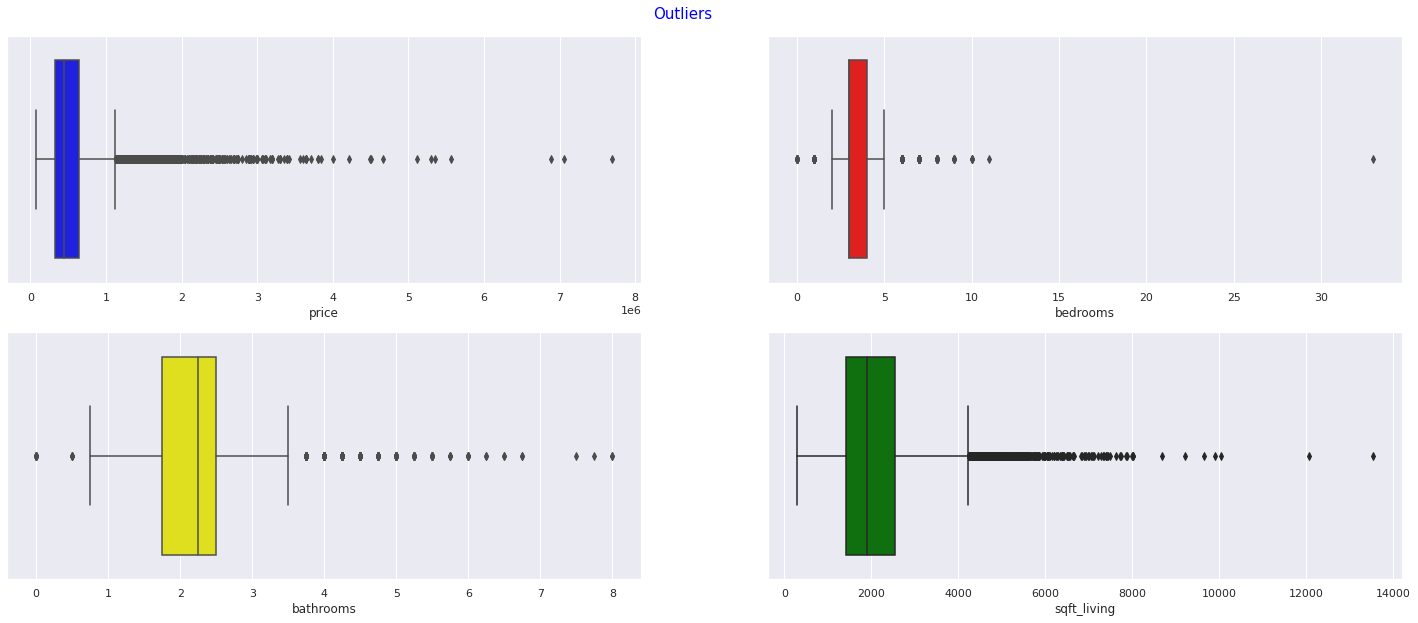

In [65]:
# Checking Outliers

# Creating a list of columns to check for outliers
# Creating a list of colors
#
col_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living']
colors = ['blue', 'red', 'yellow', 'green']

# Plotting boxplots of the col_list columns to check for outliers
#
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (25, 10))
plt.suptitle('Outliers', fontsize = 15, y = 0.92, color = 'blue')
for ax, data, column, color in zip(axes.flatten(), df, col_list, colors):
  sns.boxplot(df[column], ax = ax, color = color)

# 4. External Data Source Validation

The datasource is valid in comparison to other housing datasets available online

# 5. Data Cleaning Procedures 

In [ ]:
df = df.drop(['id'], axis=1)

In [ ]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
df.duplicated().any()

True

# 6. Exploratory Data Analysis

In [ ]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# 1. Univariate 

In [ ]:
# Creating a user defined function for univariate visuals 
def univariate_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    df[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(10, 8), rot=90)
  elif kind == 'bar':
    df[column].value_counts().plot(kind=kind, figsize=(12, 15), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

In [ ]:
# Plotting the number of bedrooms 


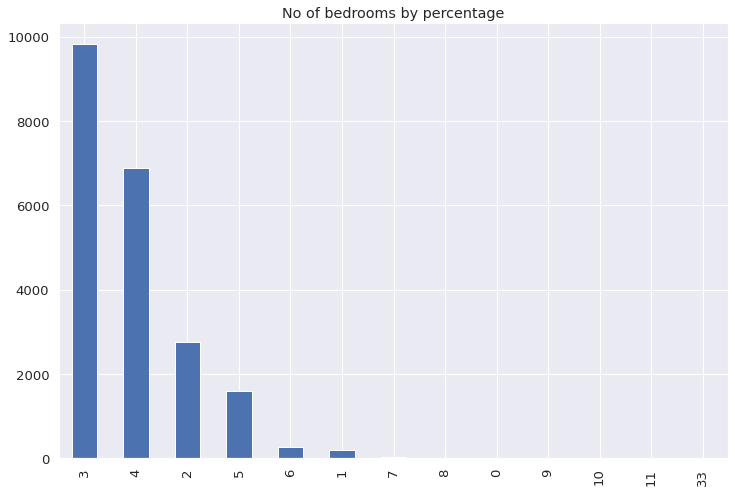

In [ ]:
# Pie chart showing the percentage of respondents willing and not willing to take the vaccine
univariate_visuals('bedrooms', 'bar', 'No of bedrooms by percentage', '', '')

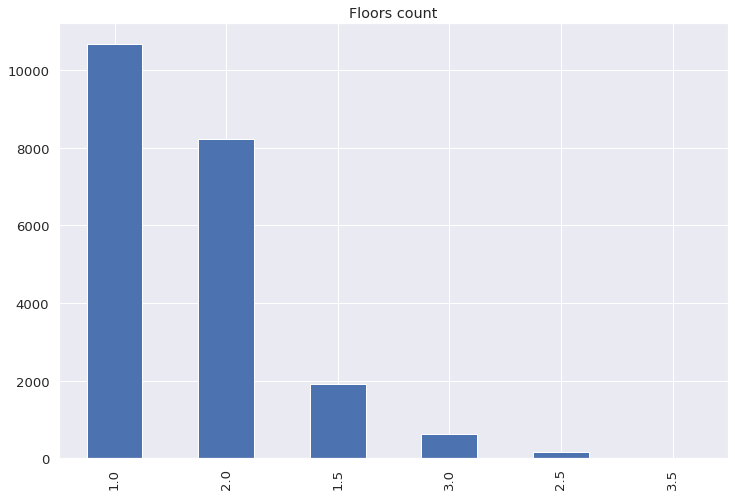

In [ ]:
# Plotting the number of floors 

univariate_visuals('floors', 'bar', 'Floors count', '', '')

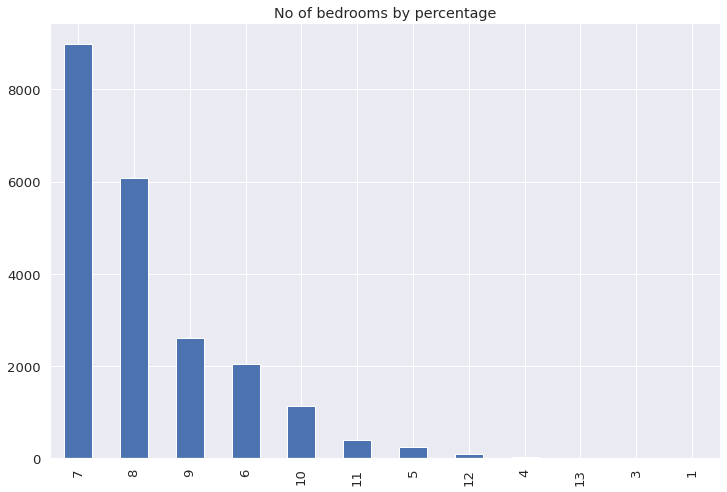

In [ ]:
# Bar graph showing the house grades
univariate_visuals('grade', 'bar', 'No of bedrooms by percentage', '', '')

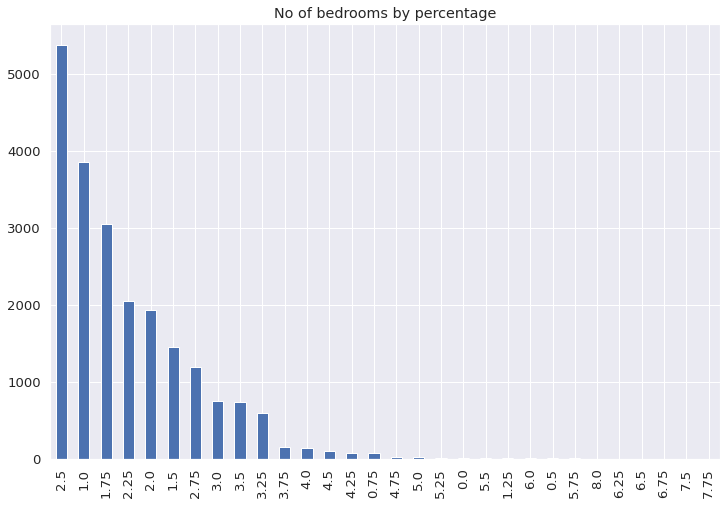

In [ ]:
# Bar graph showing the number of bathrooms 
univariate_visuals('bathrooms', 'bar', 'No of bedrooms by percentage', '', '')

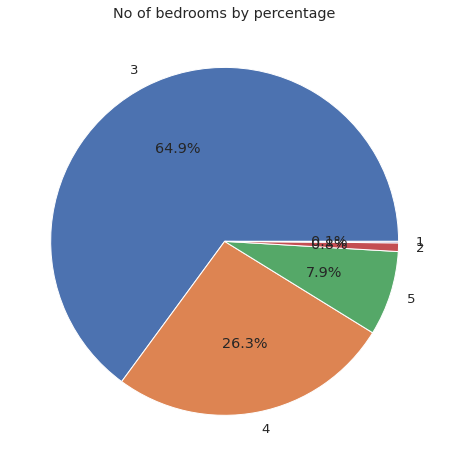

In [ ]:
# Pie chart showing house conditions by count 

univariate_visuals('condition', 'pie', 'No of bedrooms by percentage', '', '')

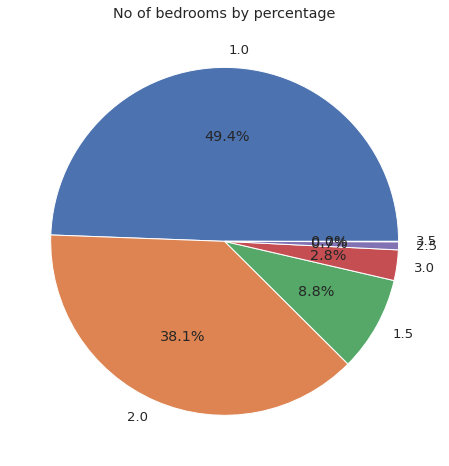

In [ ]:
# Pie chart showing the percentage of respondents willing and not willing to take the vaccine
univariate_visuals('floors', 'pie', 'No of bedrooms by percentage', '', '')

In [ ]:
# 3. Multivariate 

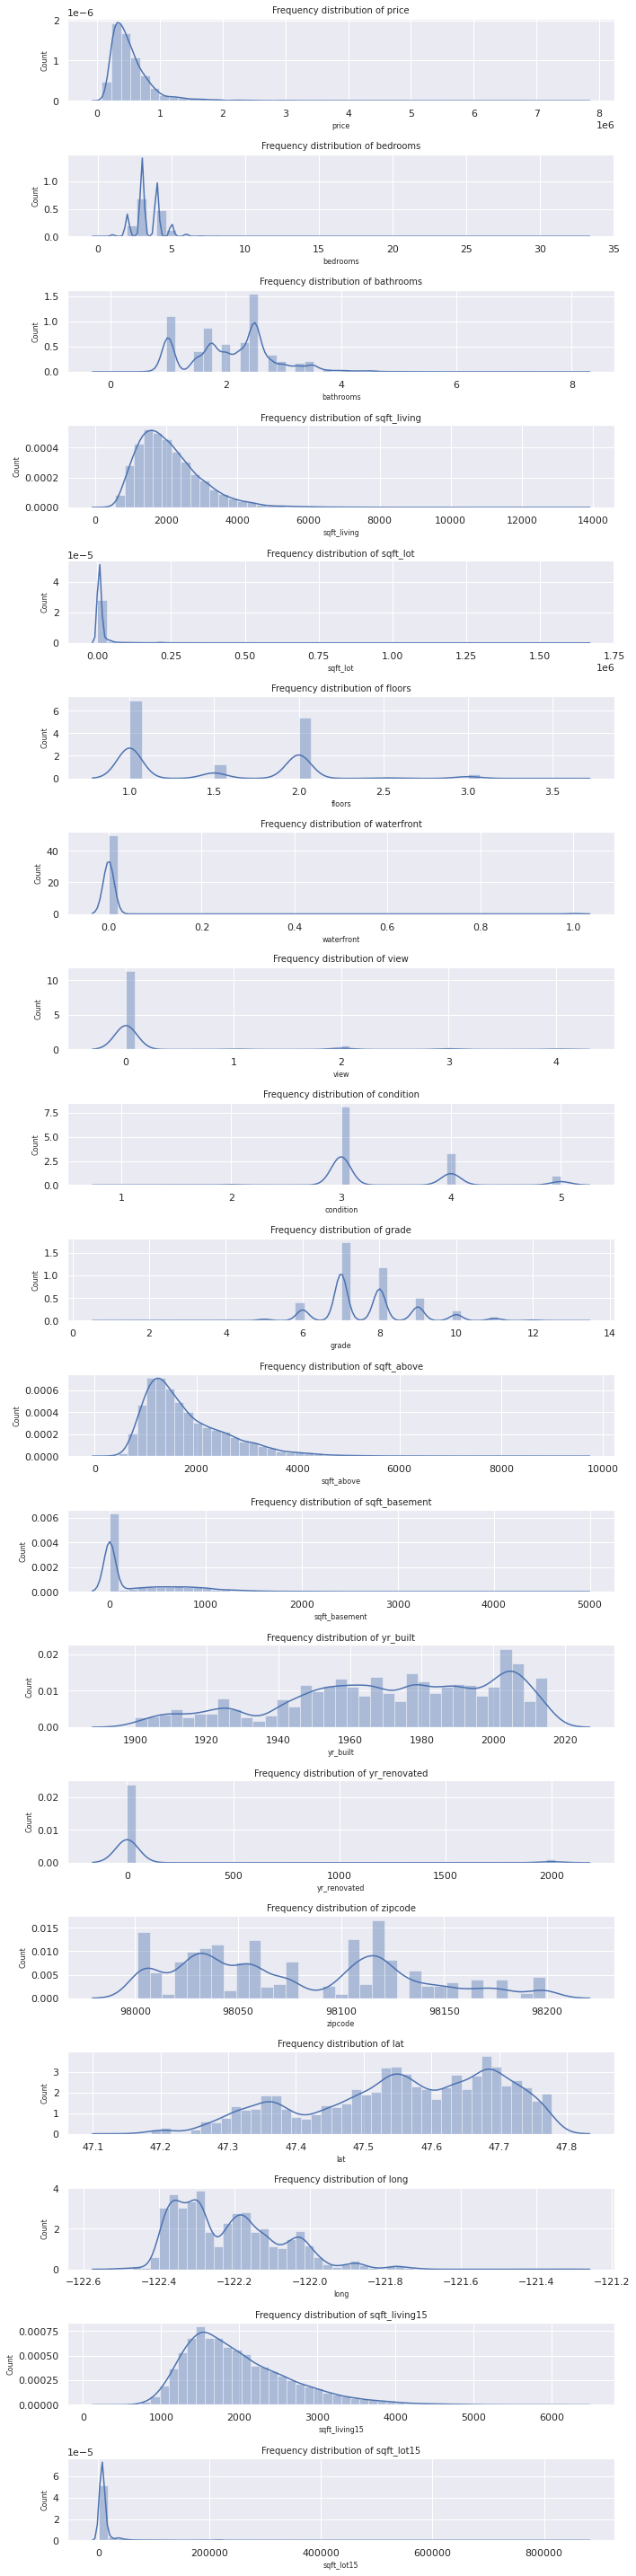

In [ ]:

# Plotting distribution of numerical variables
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
fig, ax = plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):

    sns.distplot(df[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)
    
plt.tight_layout()
plt.show();

In [ ]:
# 4. Correlation

In [ ]:
# Displaying the correlations between the variables
#
correlation = df.drop('price', axis = 1).corr()
correlation

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,0.072075,0.167649,-0.158214,0.755923,1.000000,-0.051943,0.423898,0.023285,-0.261190,-0.000816,0.343803,0.731870,0.194050


<function matplotlib.pyplot.show>

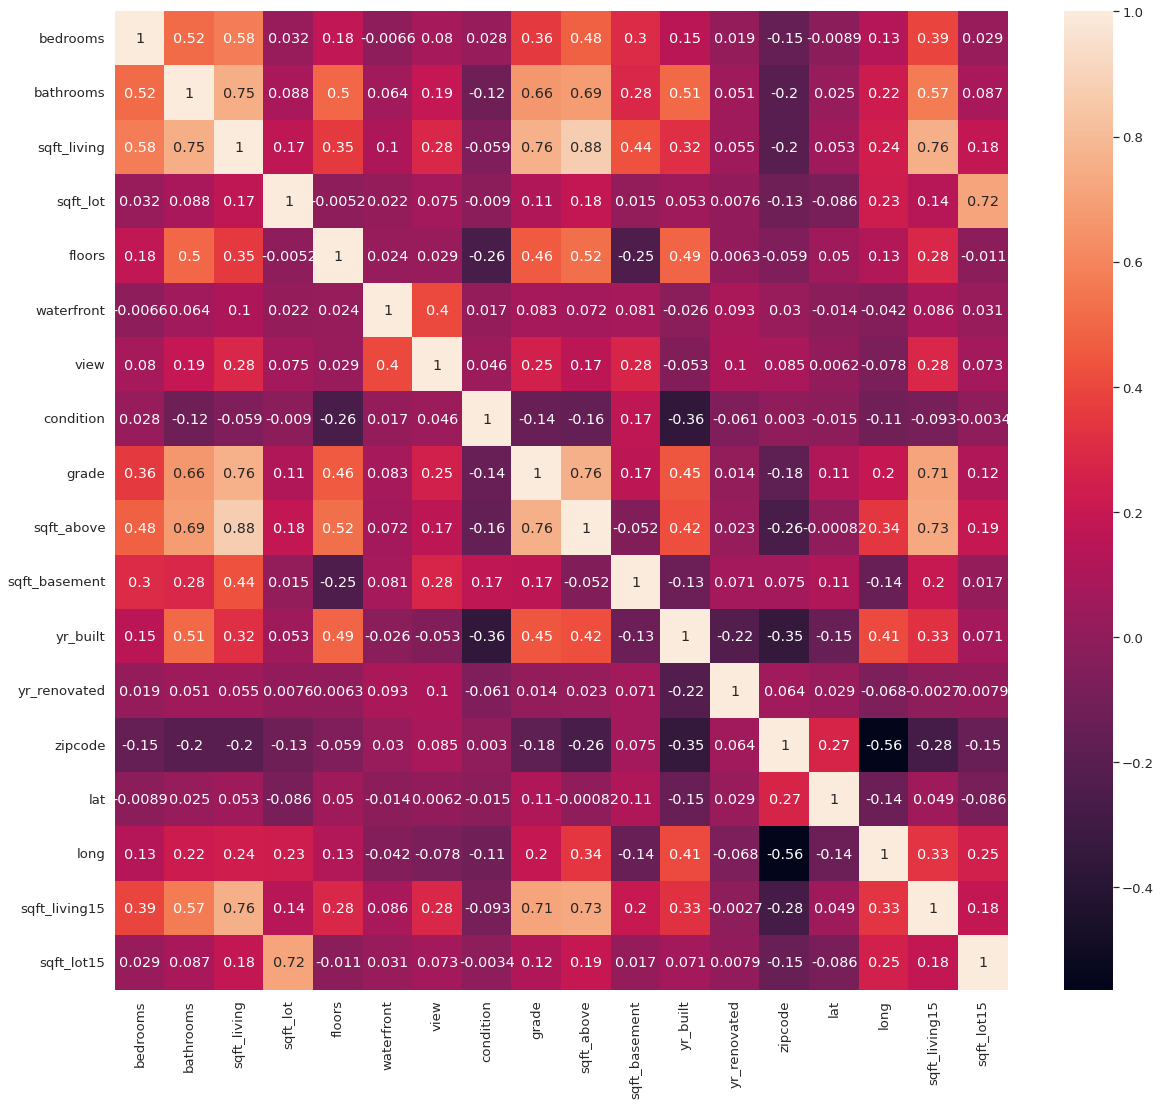

In [ ]:
# Creating a heatmap of the correlation
#

plt.figure(figsize= (20,18))
sns.heatmap(correlation, annot = True)
plt.show 

In [51]:
# Checking the VIF score for each variable using an inverse of the correlation matrix

pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.652063,-0.461171,-1.992659e-01,0.049361,0.049695,0.063235,0.114111,-0.050767,0.307048,-7.011864e-01,-3.915263e-01,0.134498,0.045454,0.080112,0.050789,0.017395,0.025213,0.085400
bathrooms,-0.461171,3.350793,-5.065088e+00,-0.024127,-0.675075,0.009760,-0.041645,-0.137020,-0.268005,3.294637e+00,1.364690e+00,-0.935779,-0.259782,0.041796,-0.040956,0.054055,0.092133,0.071471
sqft_living,-0.194966,-5.071189,-3.387473e+13,-0.124043,0.517568,0.452759,-0.595614,-0.364700,-0.782729,3.054236e+13,1.632343e+13,1.667302,0.064509,-0.145859,0.023060,-0.122991,-0.994869,-0.183892
sqft_lot,0.049361,-0.024127,-1.235861e-01,2.102522,0.045263,0.027310,-0.058998,0.030561,-0.053851,-8.783379e-02,1.708186e-02,0.098762,0.021443,-0.002610,0.053366,-0.133162,0.163944,-1.459319
floors,0.049695,-0.675075,5.202809e-01,0.045263,2.011907,-0.005281,-0.040627,0.089673,-0.230851,-9.729981e-01,3.653124e-01,-0.481480,-0.080603,-0.170766,-0.127637,0.164067,0.272617,0.072658
waterfront,0.063235,0.009760,4.535901e-01,0.027310,-0.005281,1.203766,-0.492545,-0.012670,0.049240,-5.210685e-01,-2.222588e-01,-0.021050,-0.065403,0.022551,0.009896,0.027438,0.054452,-0.018470
view,0.114111,-0.041645,-5.970543e-01,-0.058998,-0.040627,-0.492545,1.435160,-0.021475,-0.185237,5.777019e-01,3.111248e-02,0.151620,-0.040236,-0.140679,0.118486,0.071508,-0.325615,-0.007493
condition,-0.050767,-0.137020,-3.656613e-01,0.030561,0.089673,-0.012670,-0.021475,1.249475,-0.054454,3.852153e-01,7.868618e-02,0.561549,0.206672,0.161268,0.063674,-0.007029,0.075861,-0.028255
grade,0.307048,-0.268005,-7.836861e-01,-0.053851,-0.230851,0.049240,-0.185237,-0.054454,3.417046,-9.023339e-01,-1.081529e-01,-0.638980,-0.071422,0.083321,-0.330869,0.393834,-0.911603,0.071874
sqft_above,-0.699368,3.299068,3.054236e+13,-0.087524,-0.970955,-0.520315,0.576573,0.384385,-0.903970,-2.753782e+13,-1.471765e+13,-0.983300,-0.059088,0.055792,0.160279,-0.230789,-0.638711,-0.009918


In [54]:
# Residual plot to check for homoscedacity 

X = df.drop(['price'],axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset
residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,price
count,4.323000e+03
mean,4.626522e+03
std,1.905608e+05
min,-3.209654e+06
25%,-7.275269e+04
50%,1.235819e+04
75%,1.013156e+05
max,1.030723e+06


In [55]:
print(residuals.mean())

4626.521853470798


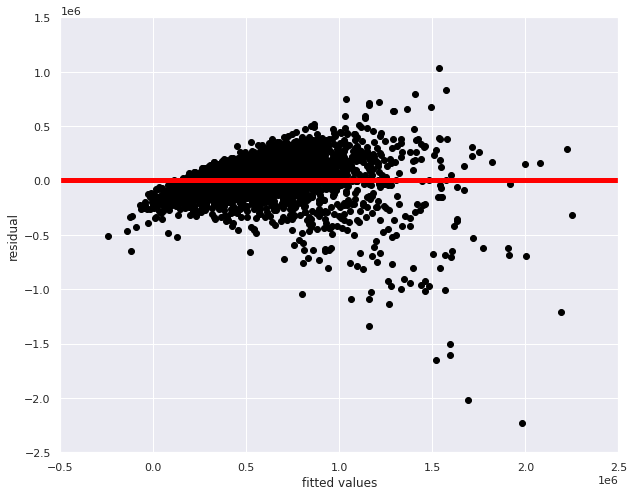

In [56]:

fig = plt.figure(figsize=(10, 8))
plt.scatter(y_predict, residuals, color='black')
plt.ylim(-2500000, 1500000)
plt.xlim(-500000, 2500000)
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=5)
plt.show()

# The graph has a cone shape 

In [57]:
# performing a heteroskedasticity test using bartlett's test.
# -Null Hypothsis: The variance is equal for all our datapoints

# -Alternative Hypothesis: The variance is different for at least one pair of datapoints.

#importing the library
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_predict, residuals)

#  compute a critical value of the chi squared distribution which helps to interpret the results 
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(p_value)

# If the test_result is greater than the critical value, then the null hypothesis rejected. 
#This would mean that there are patterns to the variance of the data

# the null hypothesis that the variance is homogeneous across the data is accepted

if (test_result > critical_value):
  print('The variances are unequal, and the model should be reassessed')
else:
  print('The variances are homogeneous!')

4.001488509093475e-189
The variances are homogeneous!


## Implementing the Solution - Regression Models

# 6. Linear Regression

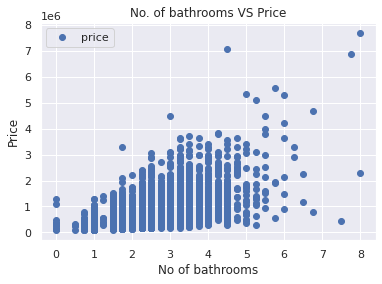

In [66]:
# Plotting the no.of bathrooms against price 

df.plot(x='bathrooms', y='price', style='o')
plt.title('No. of bathrooms VS Price')
plt.xlabel('No of bathrooms')
plt.ylabel('Price')
plt.show()


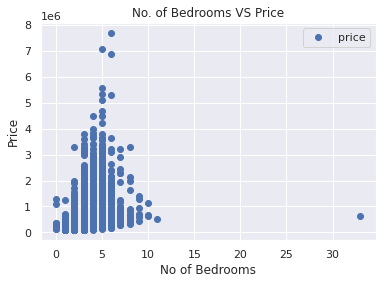

In [67]:
c


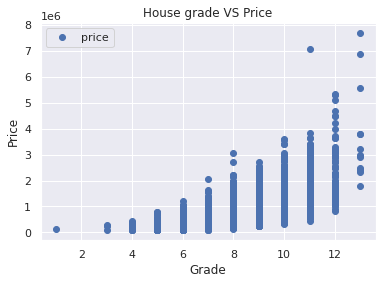

In [68]:
# Plotting the grade against price 

df.plot(x='grade', y='price', style='o')
plt.title('House grade VS Price')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


In [58]:
#data for model 2
X = df.drop(['price'],axis=1)
y = df[['price']]
X.shape,y.shape

((21613, 18), (21613, 1))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [60]:
# Fitting the Linear Regression to the dataset  

linear_reg= LinearRegression()  
linear_reg.fit(X,y) 

LinearRegression()

In [61]:
from pandas import Series, DataFrame
print('--------Trainig Linear Regression Model---------------')
linear_reg = LinearRegression()
#training the model
linear_reg.fit(X_train,y_train)

#predicting on cv
pred = linear_reg.predict(X_train)

#calculating mse
mse = np.mean((pred - X_train)**2)
print('\nMean Sqaured Error are:\n ', mse )

#Let us take a look at the coefficients of this linear regression model.
# calculating coefficients
#coeff = DataFrame(X.columns)

#coeff['Coefficient Estimate'] = Series(lreg.coef_)

#print(coeff)

--------Trainig Linear Regression Model---------------

Mean Sqaured Error are:
  bedrooms         3.920185e+11
bathrooms        3.920198e+11
sqft_living      3.892832e+11
sqft_lot         3.746509e+11
floors           3.920206e+11
waterfront       3.920223e+11
view             3.920219e+11
condition        3.920186e+11
grade            3.920135e+11
sqft_above       3.897078e+11
sqft_basement    3.915967e+11
yr_built         3.898851e+11
yr_renovated     3.918872e+11
zipcode          2.951519e+11
lat              3.919707e+11
long             3.921551e+11
sqft_living15    3.895704e+11
sqft_lot15       3.773414e+11
dtype: float64


In [62]:
#there is little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(linear_reg.coef_,X_train.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bedrooms': array([-3.47007233e+04,  3.94537780e+04,  1.12667741e+02,  1.75770479e-01,
         7.42274767e+03,  6.05764114e+05,  5.28006756e+04,  2.61936914e+04,
         9.36843361e+04,  7.28330231e+01,  3.98347181e+01, -2.60926415e+03,
         2.01216818e+01, -5.67605311e+02,  6.04949838e+05, -2.22616017e+05,
         2.42427006e+01, -4.67518411e-01])}

In [69]:
# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# create the residual by substracting the test value from the predicted value for each row in our dataset
print(y_predict, y_test)

[ 378375.36762052 1540515.29600872  544561.80259786 ...  359760.71574584
  206898.33210523  433601.50511871]            price
17384   297000.0
722    1580000.0
2680    562100.0
18754   631500.0
14554   780000.0
...          ...
5427    844000.0
16547   335500.0
4585    369950.0
17762   300000.0
16323   575950.0

[4323 rows x 1 columns]


In [71]:
print('\n\nModel performance on Test data = ')
print(linear_reg.score(X_train,pred))




Model performance on Test data = 
1.0


# 7.  Quantile Regression

In [236]:
df_copy 

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.000,3,1.000,1180,5650,1.000,0,0,3,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,538000.000,3,2.250,2570,7242,2.000,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,180000.000,2,1.000,770,10000,1.000,0,0,3,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,604000.000,4,3.000,1960,5000,1.000,0,0,5,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,510000.000,3,2.000,1680,8080,1.000,0,0,3,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.000,3,2.500,1530,1131,3.000,0,0,3,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,400000.000,4,2.500,2310,5813,2.000,0,0,3,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,402101.000,2,0.750,1020,1350,2.000,0,0,3,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,400000.000,3,2.500,1600,2388,2.000,0,0,3,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


In [237]:
df_copy.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [238]:
#Creating target and features
X = df_copy.drop(['price'],axis=1).values
y = df_copy['price'].values


In [239]:
#train and test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#checking features train and test shape
X_train.shape,X_test.shape

((17290, 18), (4323, 18))

In [240]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Scalling the data
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_Y = StandardScaler()
y_trainS = sc_Y.fit_transform(y_train.reshape(-1,1))
y_testS = sc_Y.transform(y_test.reshape(-1,1))

In [241]:
X_train[0:1]

array([[-0.39003389, -1.44813729, -0.55395019, -0.23023661, -0.91794048,
        -0.09067554, -0.30872938,  0.9125681 , -0.56106598, -0.86348039,
         0.46635412, -1.05018286, -0.21397278,  0.69274638,  0.96485795,
        -0.74469432, -0.31691025, -0.23245796]])

In [242]:
X_test[0:1]

array([[-1.45036186, -0.8006594 , -0.7055937 , -0.32155637,  2.76810513,
        -0.09067554, -0.30872938, -0.62557797, -0.56106598, -0.43071815,
        -0.66074282,  0.95086322, -0.21397278,  0.87964791,  1.16684844,
        -0.53864264, -0.81236696, -0.40280938]])

In [243]:
y_trainS[0:1]

array([[-0.12851552]])

In [244]:
y_testS[0:1]

array([[-0.65982525]])

In [245]:
# Checking mean and standard of the X_train data at column 4
print("mean = " + str(np.mean(X_train[:,4])))
print("std = " + str(np.std(X_train[:,4])))

mean = 6.57529425804604e-18
std = 0.9999999999999549


In [246]:
# Importing the neccessary libraries
from scipy.stats import spearmanr
from statsmodels.graphics.gofplots import qqplot
plt.style.use('bmh')
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.formula.api as sm
from statsmodels.regression.quantile_regression import QuantReg
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x)) #Limiting floats output to 3 decimal points

In [247]:
#PCA with 5 principal components
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(X_train)
principalComponentsTest = pca.transform(X_test)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])
principalDftest = pd.DataFrame(data = principalComponentsTest
             , columns = ['PrincComp_1', 'PrincComp_2','PrincComp_3','PrincComp_4','PrincComp_5'])

In [248]:
#getting PCA component variance ratio
print('Variance explained by all components: ' + str(pca.explained_variance_ratio_.sum()))
pca.explained_variance_ratio_

Variance explained by all components: 0.660216951284297


array([0.29018425, 0.12299021, 0.10371269, 0.07629671, 0.06703309])

In [249]:
#creating Principal dataframe for target training dataframe
principalDf['price'] = y_trainS 

In [250]:
# importing the statsmodels library
import statsmodels.formula.api as sm
# creating a startsmodel formula using principal components and target training dataframe
mod = sm.quantreg('price ~ PrincComp_1 + PrincComp_2 + PrincComp_3 + PrincComp_4 + PrincComp_5', principalDf)
#fitting the QUantile Regression model using the quantreg package
res = mod.fit(q=.5)
#results summary 
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                  price   Pseudo R-squared:               0.3616
Model:                       QuantReg   Bandwidth:                     0.07358
Method:                 Least Squares   Sparsity:                       0.9706
Date:                Sat, 27 Nov 2021   No. Observations:                17290
Time:                        12:30:16   Df Residuals:                    17284
                                        Df Model:                            5
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0808      0.004    -21.893      0.000      -0.088      -0.074
PrincComp_1     0.2111      0.002    130.747      0.000       0.208       0.214
PrincComp_2     0.2306      0.002     92.965      0.000       0.226       0.235
PrincComp_3     0.0113      0.003      4.166   

In [257]:
# Splitting our data into training and test sets

X = df_copy[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_basement', 'yr_built',
        'sqft_living15', 'sqft_lot15']].values
y = df_copy['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [259]:
# Finding the regression coefficients for the conditioned median, 0.5 quantile

import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', df_copy)
res = mod.fit(q=.5)
res
# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3669
Model:                       QuantReg   Bandwidth:                   2.474e+04
Method:                 Least Squares   Sparsity:                    3.475e+05
Date:                Sat, 27 Nov 2021   No. Observations:                21613
Time:                        12:35:20   Df Residuals:                    21601
                                        Df Model:                           11
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.18e+06   1.04e+05     20.890      0.000    1.98e+06    2.38e+06
X[0]       -3.486e+04   1618.551    -21.540      0.000    -3.8e+04   -3.17e+04
X[1]       -3428.7328   2783.009     -1.232      0.218   -8883.635    2026.170
X[2]         104.5296      3.134     33.359      0.0

In [261]:
from sklearn import metrics

In [262]:
# This is our prediction for price based on our model
y_predict = res.predict()

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_predict)))
quantile_R2 = b = r2_score(y, y_predict)
print("The R2 score for the elastic model is:", quantile_R2)

Root Mean Squared Error: 244300.75614400054
The R2 score for the elastic model is: 0.557736898197203


In [ ]:
# LDA 

features= df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']]
target = df['price']

# Subject our features to LDA model

# Import Linear Discriminant Analysis method from sklearn library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Create an instance of LDA
lda = LDA()

lda_= lda.fit(features, target)
lda_feat = lda_.transform(features)

# Display the coefficients of the reducted columns
lda_.coef_

# Since the coefficients are in an array, we need to create a dataframe so 
#that we can extract the name of the columns

f_imp = pd.DataFrame(index=features.columns.values, data=lda_.coef_[0].T)
f_imp.sort_values(0, ascending=False)

,0
long,19.720094
floors,1.364673
yr_built,0.143880
zipcode,0.013058
sqft_basement,0.002284
sqft_living,0.001835
sqft_above,0.000813
sqft_lot15,0.000022
price,0.000000
sqft_lot,-0.000019


# 7. Ridge Regression

In [78]:
X = df.drop(['price'],axis=1)
y = df['price']
X.shape,y.shape

((21613, 18), (21613,))

In [81]:
# Creating our baseline regression model
# This is a model that has no regularization

linear_reg = LinearRegression()
linear_reg.fit(X,y)
# Making predictions
#
y_pred = linear_reg.predict(X_test)
model1 = (mean_squared_error(y_true=y,y_pred=linear_reg.predict(X)))
print(model1)
print('Variance score: {0:.2f}'.format(linear_reg.score(X_test, y_pred)))
#The output  value of 40504545596.74054 will be the indicator to determine if the regularized ridge regression model is better or worse

40518022074.27615
Variance score: 1.00


In [82]:
from sklearn.linear_model import Ridge
# ridge regression model 
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [83]:
#use the .fit function to run the model and then use the .best_params_ and
#  .best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

41016657649.82229

In [84]:
#confirm this by fitting our model with the ridge information and finding the mean squared error below
#
ridge = Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
print(second_model)

# The ridge model performance is less

40524344765.438995


In [85]:
# There is very little difference between the ridge and baseline models. 
# This is confirmed with the coefficients of each model found below.
# 
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'bathrooms': 40884.07813712112,
 'bedrooms': -34569.638519169064,
 'condition': 26791.349233880308,
 'floors': 7306.257247488356,
 'grade': 94215.72385599288,
 'lat': 598255.0981131925,
 'long': -213193.57128552833,
 'sqft_above': 91.02648833665292,
 'sqft_basement': 61.14100627278198,
 'sqft_living': 88.19549519214765,
 'sqft_living15': 24.475288209358133,
 'sqft_lot': 0.12717652124136508,
 'sqft_lot15': -0.3716169131879036,
 'view': 52959.33720759222,
 'waterfront': 578761.2214239046,
 'yr_built': -2558.22801721405,
 'yr_renovated': 20.912893430827307,
 'zipcode': -561.0449395828268}

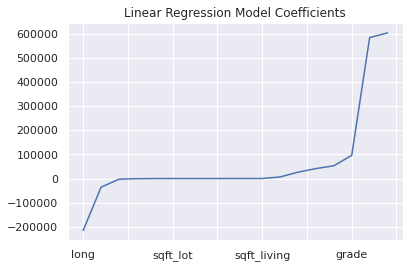

In [88]:
# Plotting
# 
coef_dict_baseline = {}
for coef, feat in zip(linear_reg.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline
#checking the magnitude of coefficients

predictors = X.columns

linear_coef = Series(coef_dict_baseline).sort_values()

linear_coef.plot(kind='line', title='Linear Regression Model Coefficients')

# 8. Lasso Regression

In [120]:
X = df.drop(['price'],axis=1)
y = df[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Importing StandardScaler
#
from sklearn.preprocessing import StandardScaler

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Importing linear models
# 
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 

# Print scores, MSE, and coefficients
# 
print("lasso score:", lasso.score(X, y)) 
print("lasso MSE:", mean_squared_error(y, lasso.predict(X))) 
print("lasso coef:", lasso.coef_) 

lasso score: 0.6505537920721809
lasso MSE: 47157334240.54743
lasso coef: [   3008.92424474   91931.65096652    3682.31125875   53198.40472421
   52220.71735158   13881.81118006  199116.46970055 -104061.73865539
  -32547.09636618   80180.63388965  -10023.15309997]


In [121]:
# Importing library for visualization
#
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
coefsLasso = [] 

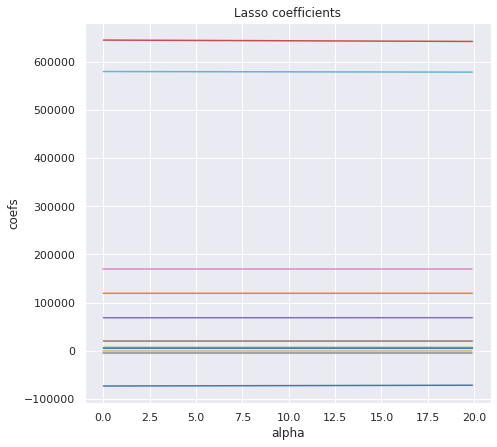

In [122]:
# Fitting Lasso for 200 values of alpha and write the coefficients into array
# 
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()

# 9. Elastic Net Regression

In [89]:
# Importing our libraries
# 
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Elastic Net Model

X=df.drop(['price'],axis=1)
y=df[['price']]


In [96]:
# Normalizing the data 
# Create the gridsearch.
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1)

In [95]:
# Fitting the model 
# Displaying the best parameters and the best results.
# 41050144976.83428()
search.fit(X,y)
search.best_params_
abs(search.best_score_)

41177040367.511566

In [93]:
# Elastic model performance
#79369724903.44846
elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print(second_model)

79376555016.66553


# 10. Challenging the Solution

In [99]:
# Dropping columns with less importance
df = df.drop(['sqft_living', 'sqft_lot', 'sqft_above','sqft_basement','yr_renovated','sqft_living15','sqft_lot15'],axis=1)
df.head(5)

,price,bedrooms,bathrooms,floors,waterfront,view,condition,grade,yr_built,zipcode,lat,long
0,221900.0,3,1.00,1.0,0,0,3,7,1955,98178,47.5112,-122.257
1,538000.0,3,2.25,2.0,0,0,3,7,1951,98125,47.7210,-122.319
2,180000.0,2,1.00,1.0,0,0,3,6,1933,98028,47.7379,-122.233
3,604000.0,4,3.00,1.0,0,0,5,7,1965,98136,47.5208,-122.393
4,510000.0,3,2.00,1.0,0,0,3,8,1987,98074,47.6168,-122.045


In [100]:
#splitting the data into target and features
X = df.drop("price", axis=1)
y = df[["price"]]
print(X.shape)
print(y.shape)

(21613, 11)
(21613, 1)


In [101]:
#standardize the dataset using StandardScaler function in scikit-learn. 
#the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [102]:
#split the data into train and test set with scikit-learn’s train_test_split() function using a test_size parameter.
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = test_size, random_state = seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 11)
(4323, 11)
(17290, 1)
(4323, 1)


In [103]:
# regression models offered by scikit-learn to produce a baseline accuracy for this problem. 
#the MSE (Mean Squared Error) as the performance metric for the regression models.
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
# user variables to tune
folds   = 10
metric  = "neg_mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["ridge"] = Ridge(normalize=True)

In [110]:
# 10-fold cross validation for each model
model_results = []
model_names   = []
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, shuffle = True , random_state=seed)
    results = cross_val_score(model, X_train, y_train, cv=k_fold, scoring=metric)

    model_results.append(results)
    model_names.append(model_name)
    print("{}: {}, {}".format(model_name, round(results.mean(), 3), round(results.std(), 3)))

Linear: -47341540792.83, 8108853017.259
Lasso: -47341541681.833, 8109162138.121
ElasticNet: -123808702940.286, 15103888487.63
ridge: -62855645933.599, 10597070056.054


## 11. Implementing the Solution

Lasso works better for this model, however the differences are very little